In [30]:
df = pd.read_csv("Data\Merged SPI & NDVI & VPD\Cleaned\merged_file.csv")

print(df['Region_Name'].unique())  # Check unique region names in the dataset

['Brigalow Belt' 'Cape York Peninsula' 'Central Queensland Coast'
 'Channel Country' 'Desert Uplands' 'Einasleigh Uplands' 'Gulf Plains'
 'Mitchell Grass Downs' 'Mulga Lands' 'New England Tableland'
 'Northwest Highlands' 'Southeast Queenslan' 'Wet Tropics']


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_21068\1649443688.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("Data\Merged SPI & NDVI & VPD\Cleaned\merged_file.csv")


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = df[df['Region_Name'] == 'Wet Tropics']  # Filter for Central Asia region
data.head()

,Date,SPI,NDVI,VPD,Region_Name
3192,1/01/2001,0.651293,0.728943,10.880998,Wet Tropics
3193,1/02/2001,2.000997,0.542816,7.636481,Wet Tropics
3194,1/03/2001,0.939810,0.778401,10.351246,Wet Tropics
3195,1/04/2001,0.469962,0.749986,8.793747,Wet Tropics
3196,1/05/2001,-1.532573,0.782591,10.510351,Wet Tropics


<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_14460\425967923.py:4: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv("Data\Merged SPI & NDVI & VPD\Region wise CSV\Cape_York_Peninsula.csv")


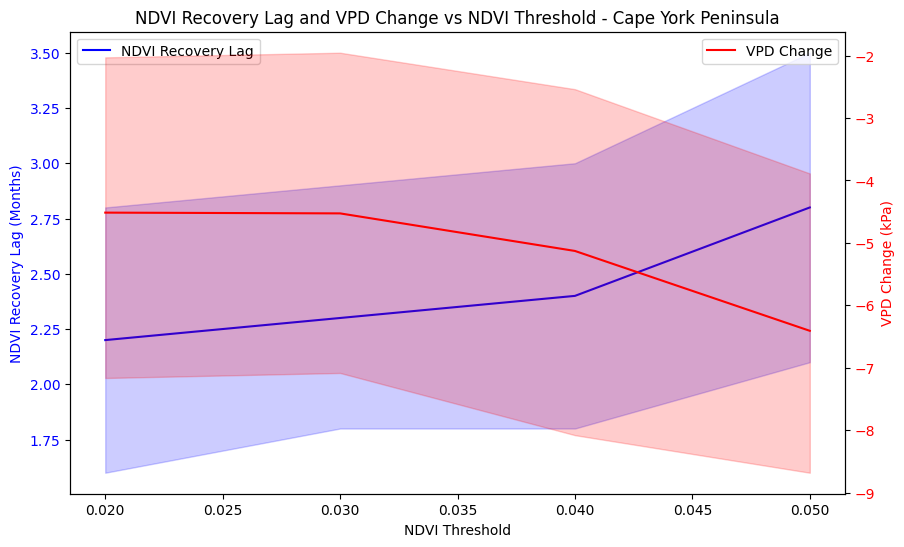

Correlation between NDVI Recovery Lag and VPD Change: -0.5862946186695859


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Data\Merged SPI & NDVI & VPD\Region wise CSV\Cape_York_Peninsula.csv")

# Example: Define your NDVI threshold range
thresholds = [0.02, 0.03, 0.04, 0.05]

# Initialize a list to store results
all_results = []

# Function to calculate NDVI recovery lag
def calculate_ndvi_recovery_lag(threshold, ndvi, spi):
    recovery_lags = []
    recovery_indices = []
    for i in range(2, len(ndvi) - 6):
        if spi[i - 1] < -1 and spi[i] > -0.5:  # SPI recovery
            ndvi_start = ndvi[i]
            for lag in range(1, 7):  # Look ahead up to 6 months
                if ndvi[i + lag] - ndvi_start >= threshold:
                    recovery_lags.append(lag)
                    recovery_indices.append(i)
                    break
    return recovery_lags, recovery_indices

# Loop through the thresholds
for threshold in thresholds:
    # Get recovery lags and start indices
    recovery_lags, recovery_indices = calculate_ndvi_recovery_lag(threshold, data['NDVI'], data['SPI'])
    
    vpd_changes = []
    for i in range(len(recovery_lags)):
        start_index = recovery_indices[i]
        lag = recovery_lags[i]
        vpd_start = data['VPD'].iloc[start_index]
        vpd_end = data['VPD'].iloc[start_index + lag]
        vpd_change = vpd_end - vpd_start
        vpd_changes.append(vpd_change)
        
        # Store the result
        all_results.append({
            'Threshold': threshold,
            'NDVI Recovery Lag (Months)': lag,
            'VPD Change (kPa)': vpd_change
        })

# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

fig, ax1 = plt.subplots(figsize=(10, 6))

# First Y-axis: NDVI Recovery Lag
sns.lineplot(data=results_df, x="Threshold", y="NDVI Recovery Lag (Months)", ax=ax1, color='blue', label='NDVI Recovery Lag')
ax1.set_ylabel('NDVI Recovery Lag (Months)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second Y-axis: VPD Change
ax2 = ax1.twinx()
sns.lineplot(data=results_df, x="Threshold", y="VPD Change (kPa)", ax=ax2, color='red', label='VPD Change')
ax2.set_ylabel('VPD Change (kPa)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('NDVI Recovery Lag and VPD Change vs NDVI Threshold - ' + data['Region_Name'].iloc[0])
ax1.set_xlabel('NDVI Threshold')
plt.show()

# Correlation between NDVI Recovery Lag and VPD Change
correlation = results_df['NDVI Recovery Lag (Months)'].corr(results_df['VPD Change (kPa)'])
print(f"Correlation between NDVI Recovery Lag and VPD Change: {correlation}")

<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_14460\1361765288.py:8: SyntaxWarning: invalid escape sequence '\M'
  csv_directory = "Data\Merged SPI & NDVI & VPD\Region wise CSV"


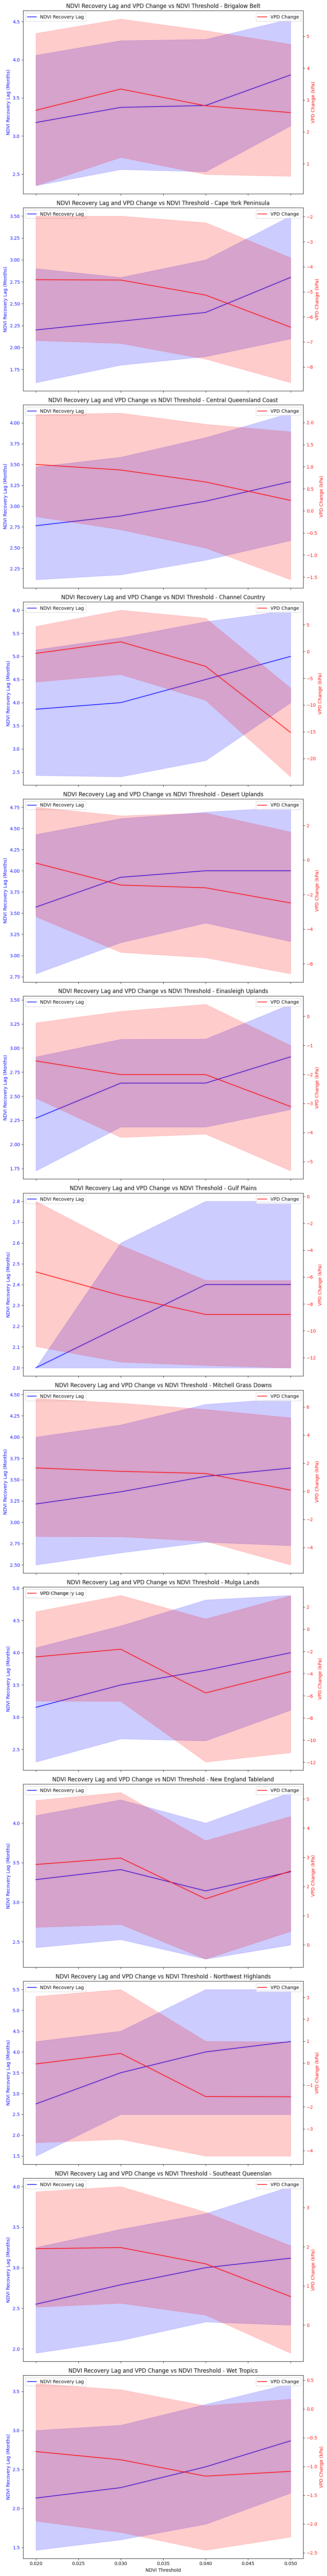

In [6]:
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Define the directory containing the CSV files
csv_directory = "Data\Merged SPI & NDVI & VPD\Region wise CSV"

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Example: Define your NDVI threshold range
thresholds = [0.02, 0.03, 0.04, 0.05]

# Initialize a dictionary to store results for each region
region_results = {}

# Function to calculate NDVI recovery lag
def calculate_ndvi_recovery_lag(threshold, ndvi, spi):
    recovery_lags = []
    recovery_indices = []
    for i in range(2, len(ndvi) - 6):
        if spi[i - 1] < -1 and spi[i] > -0.5:  # SPI recovery
            ndvi_start = ndvi[i]
            for lag in range(1, 7):  # Look ahead up to 6 months
                if ndvi[i + lag] - ndvi_start >= threshold:
                    recovery_lags.append(lag)
                    recovery_indices.append(i)
                    break
    return recovery_lags, recovery_indices

# Process each CSV file
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    data = pd.read_csv(file_path)
    region_name = data['Region_Name'].iloc[0]
    
    all_results = []
    
    # Loop through the thresholds
    for threshold in thresholds:
        # Get recovery lags and start indices
        recovery_lags, recovery_indices = calculate_ndvi_recovery_lag(threshold, data['NDVI'], data['SPI'])
        
        vpd_changes = []
        for i in range(len(recovery_lags)):
            start_index = recovery_indices[i]
            lag = recovery_lags[i]
            vpd_start = data['VPD'].iloc[start_index]
            vpd_end = data['VPD'].iloc[start_index + lag]
            vpd_change = vpd_end - vpd_start
            vpd_changes.append(vpd_change)
            
            # Store the result
            all_results.append({
                'Threshold': threshold,
                'NDVI Recovery Lag (Months)': lag,
                'VPD Change (kPa)': vpd_change
            })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(all_results)
    region_results[region_name] = results_df

# Plot all graphs in a single image
num_regions = len(region_results)
fig, axes = plt.subplots(num_regions, 1, figsize=(10, 6 * num_regions), sharex=True)

if num_regions == 1:
    axes = [axes]  # Ensure axes is iterable for a single subplot

for ax, (region_name, results_df) in zip(axes, region_results.items()):
    # First Y-axis: NDVI Recovery Lag
    sns.lineplot(data=results_df, x="Threshold", y="NDVI Recovery Lag (Months)", ax=ax, color='blue', label='NDVI Recovery Lag')
    ax.set_ylabel('NDVI Recovery Lag (Months)', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    # Second Y-axis: VPD Change
    ax2 = ax.twinx()
    sns.lineplot(data=results_df, x="Threshold", y="VPD Change (kPa)", ax=ax2, color='red', label='VPD Change')
    ax2.set_ylabel('VPD Change (kPa)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    ax.set_title(f'NDVI Recovery Lag and VPD Change vs NDVI Threshold - {region_name}')
    ax.set_xlabel('NDVI Threshold')

plt.tight_layout()
plt.show()

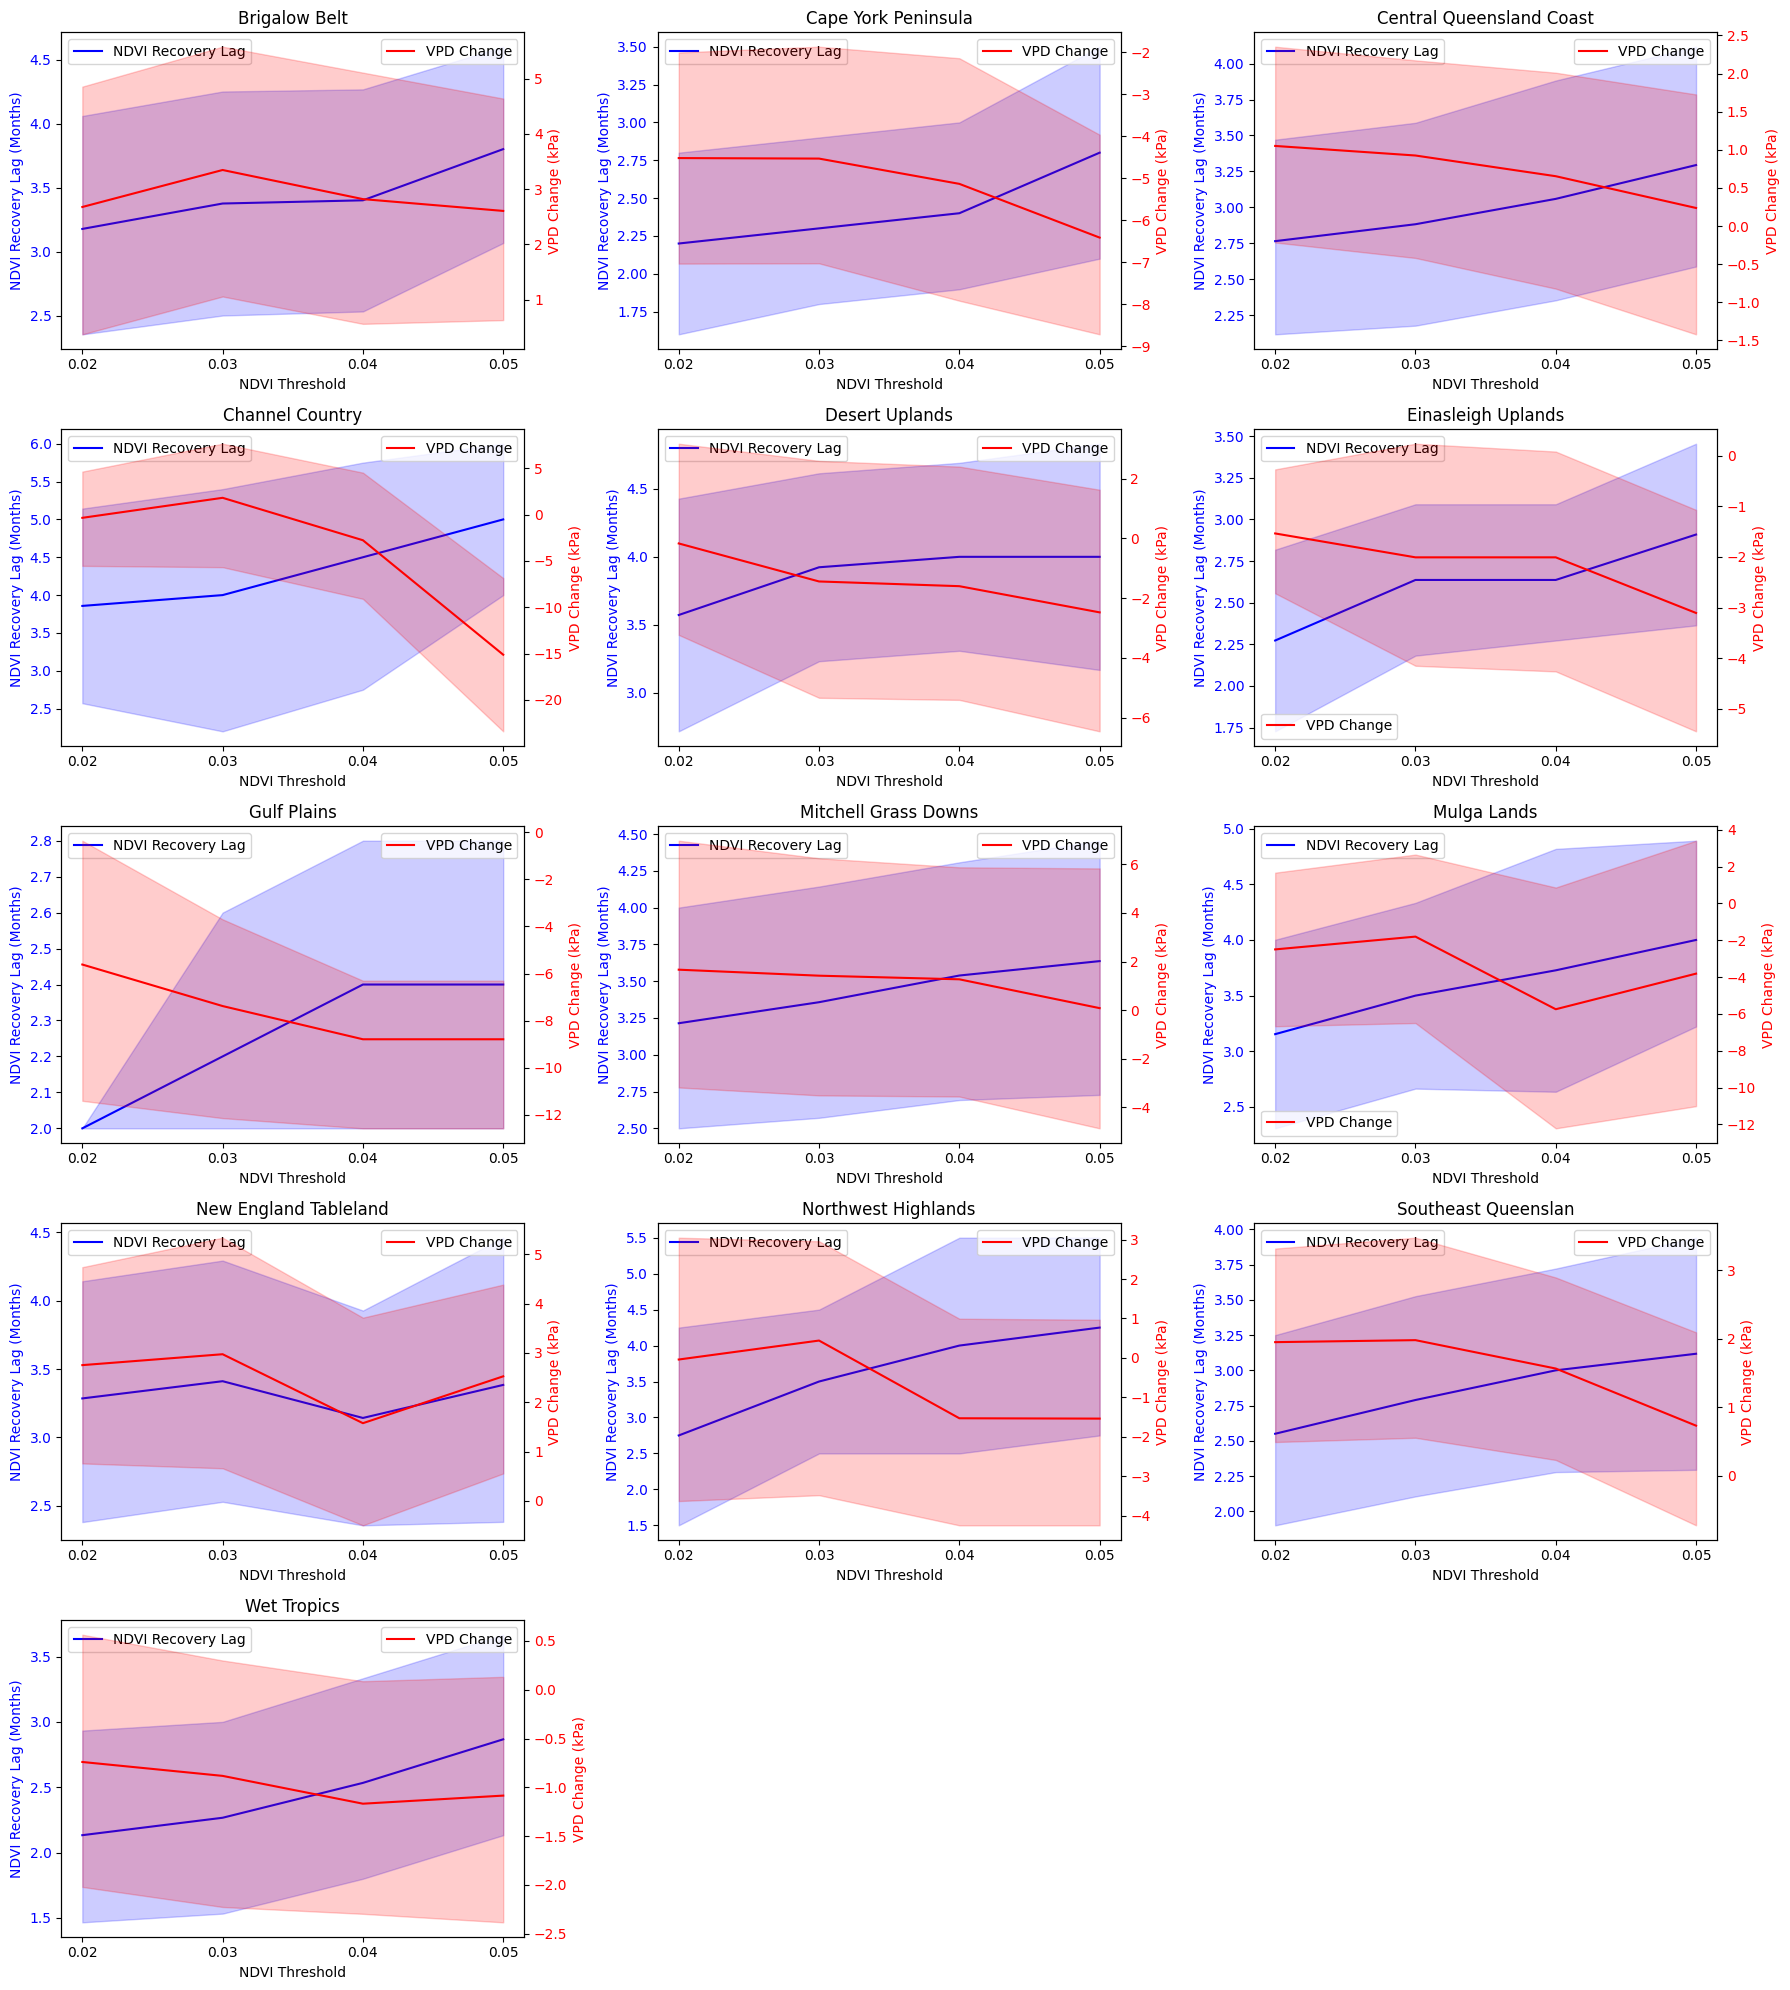

In [19]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory containing the CSV files
csv_directory = "Data\\Merged SPI & NDVI & VPD\\Region wise CSV"

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Define NDVI threshold range
thresholds = [0.02, 0.03, 0.04, 0.05]

# Store results for each region
region_results = {}

# Function to calculate NDVI recovery lag
def calculate_ndvi_recovery_lag(threshold, ndvi, spi):
    recovery_lags = []
    recovery_indices = []
    for i in range(2, len(ndvi) - 6):
        if spi[i - 1] < -1 and spi[i] > -0.5:  # SPI recovery
            ndvi_start = ndvi[i]
            for lag in range(1, 7):  # Look ahead up to 6 months
                if ndvi[i + lag] - ndvi_start >= threshold:
                    recovery_lags.append(lag)
                    recovery_indices.append(i)
                    break
    return recovery_lags, recovery_indices

# Process each CSV file
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    data = pd.read_csv(file_path)
    region_name = data['Region_Name'].iloc[0]
    
    all_results = []
    
    for threshold in thresholds:
        recovery_lags, recovery_indices = calculate_ndvi_recovery_lag(threshold, data['NDVI'], data['SPI'])
        
        for i in range(len(recovery_lags)):
            start_index = recovery_indices[i]
            lag = recovery_lags[i]
            vpd_change = data['VPD'].iloc[start_index + lag] - data['VPD'].iloc[start_index]
            
            all_results.append({
                'Threshold': threshold,
                'NDVI Recovery Lag (Months)': lag,
                'VPD Change (kPa)': vpd_change
            })
    
    region_results[region_name] = pd.DataFrame(all_results)

# Plotting: 3 plots per row
num_regions = len(region_results)
cols = 3
rows = (num_regions + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten to 1D for easy indexing

for idx, (region_name, results_df) in enumerate(region_results.items()):
    ax1 = axes[idx]
    
    # First Y-axis: NDVI Recovery Lag
    sns.lineplot(data=results_df, x="Threshold", y="NDVI Recovery Lag (Months)", ax=ax1, color='blue', label='NDVI Recovery Lag')
    ax1.set_ylabel('NDVI Recovery Lag (Months)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Second Y-axis: VPD Change
    ax2 = ax1.twinx()
    sns.lineplot(data=results_df, x="Threshold", y="VPD Change (kPa)", ax=ax2, color='red', label='VPD Change')
    ax2.set_ylabel('VPD Change (kPa)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    ax1.set_title(f'{region_name}')
    ax1.set_xlabel('NDVI Threshold')
    ax1.set_xticks(thresholds)

# Turn off unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


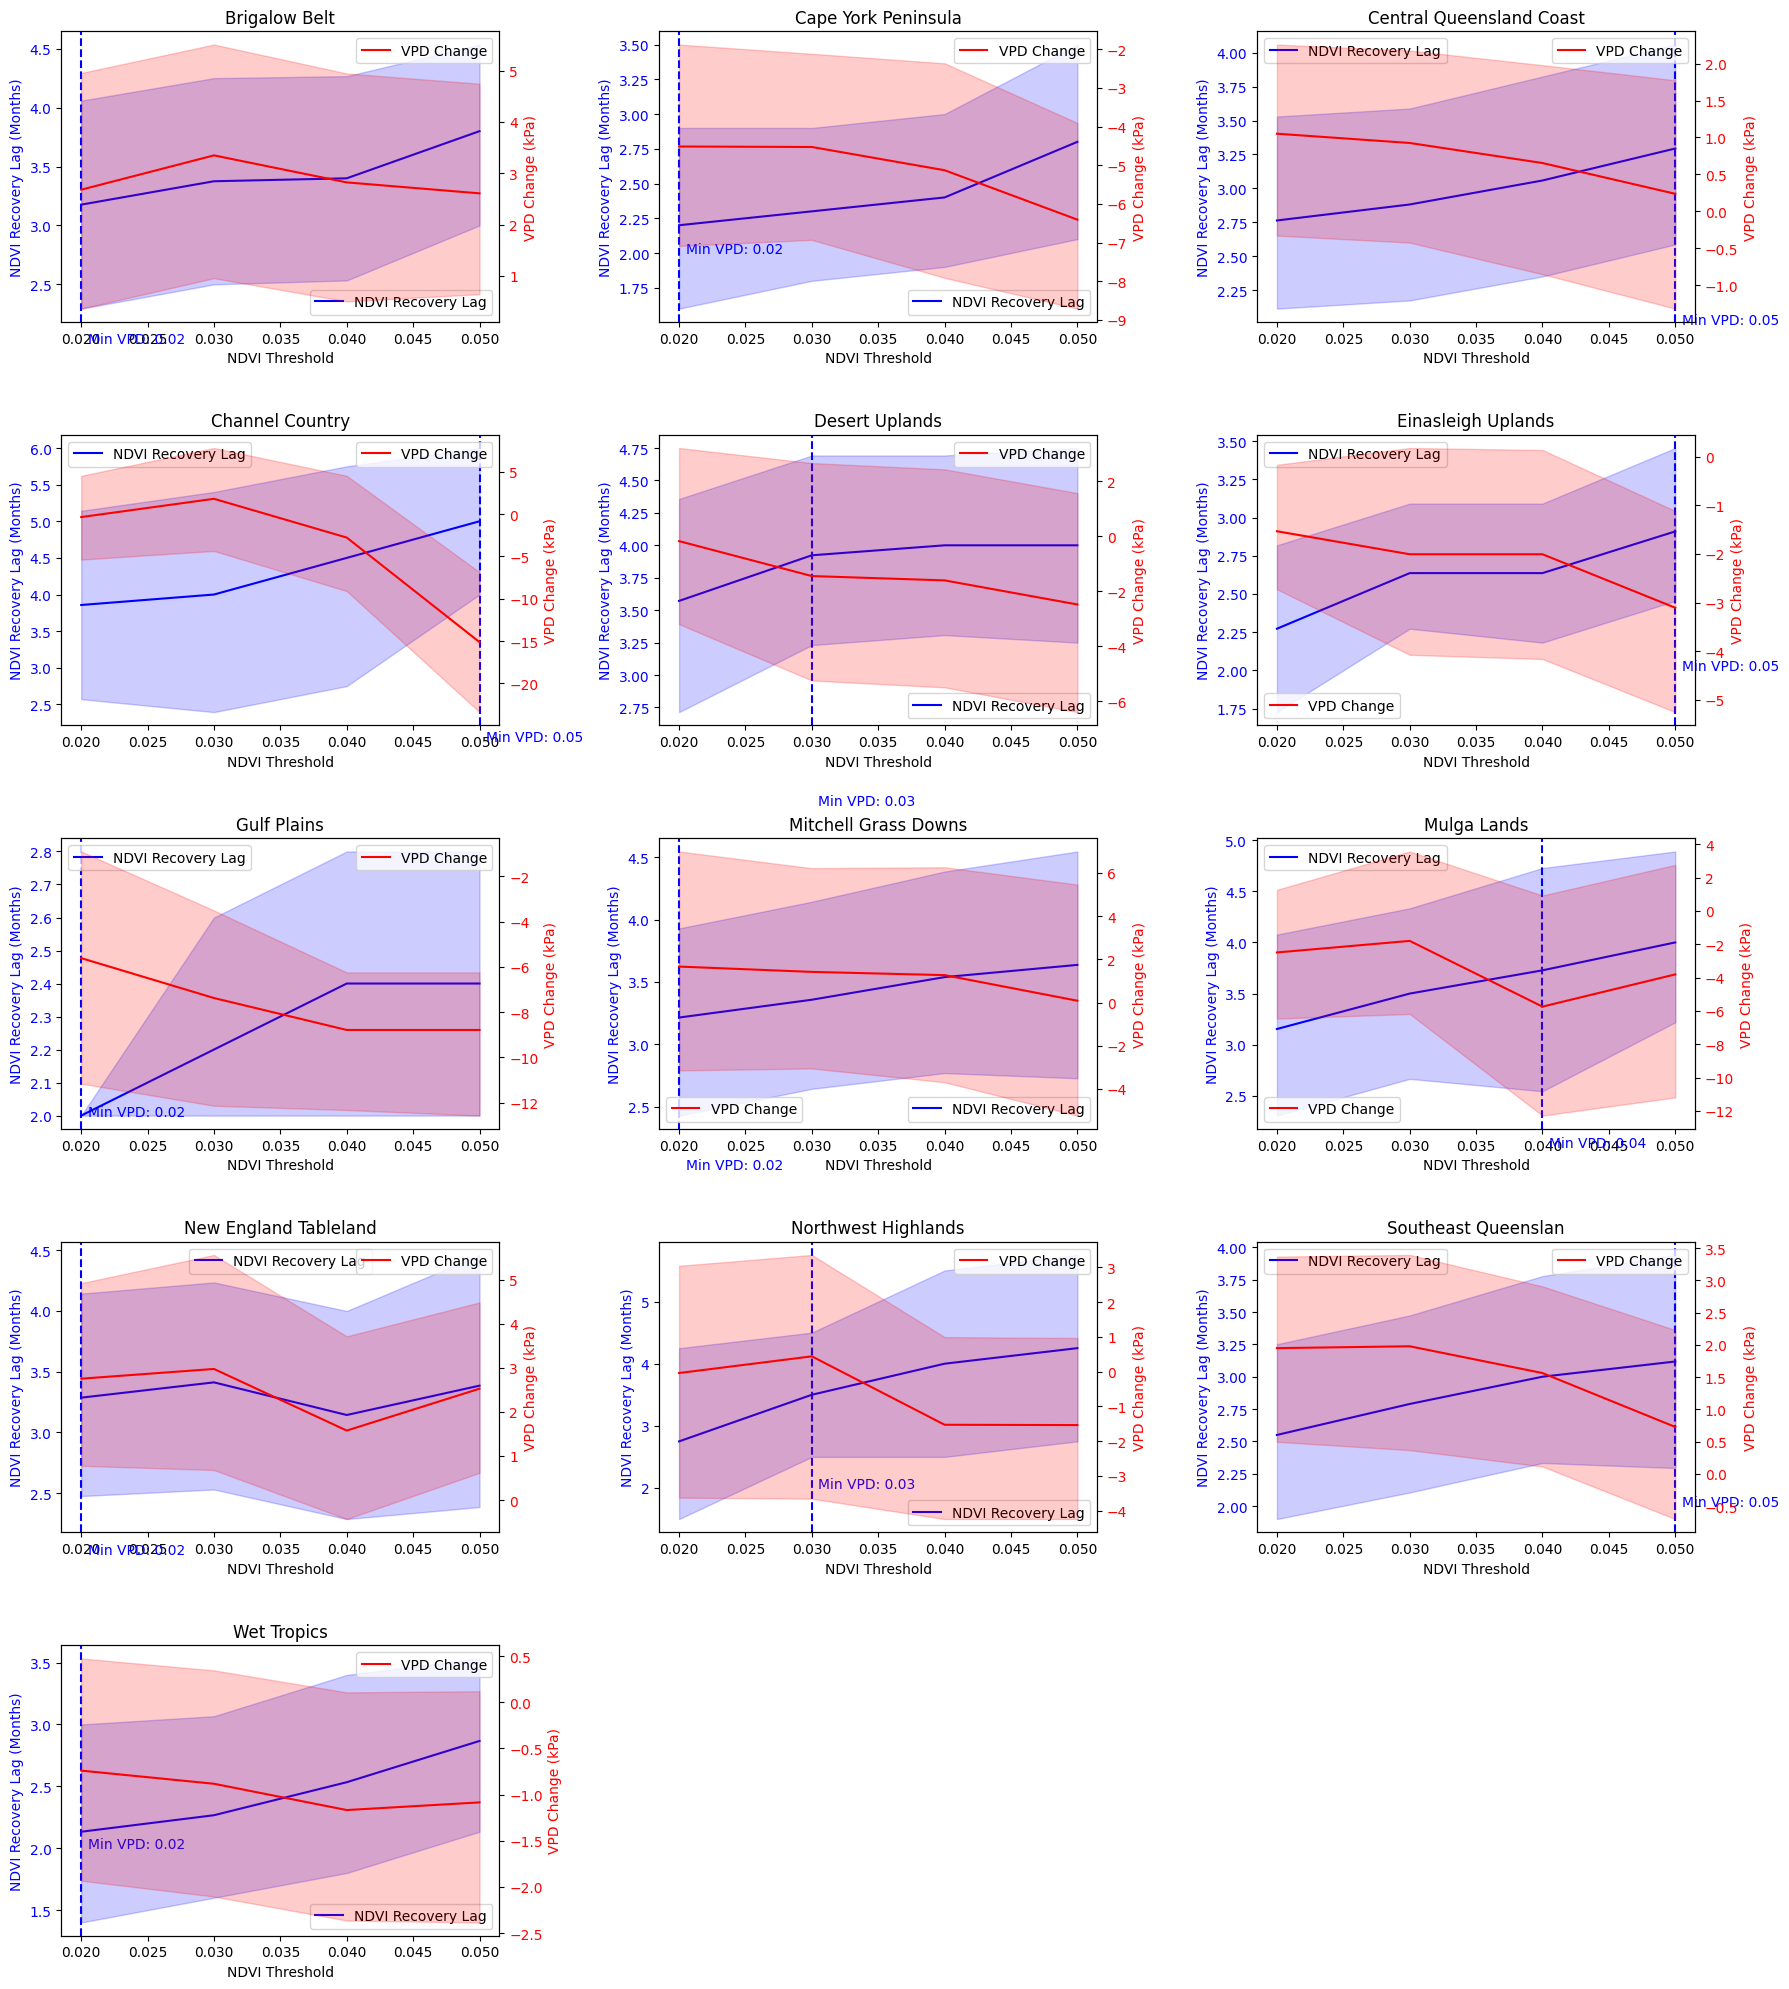

In [20]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory containing the CSV files
csv_directory = "Data\\Merged SPI & NDVI & VPD\\Region wise CSV"

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Define NDVI threshold range
thresholds = [0.02, 0.03, 0.04, 0.05]

# Store results for each region
region_results = {}

# Function to calculate NDVI recovery lag
def calculate_ndvi_recovery_lag(threshold, ndvi, spi):
    recovery_lags = []
    recovery_indices = []
    for i in range(2, len(ndvi) - 6):
        if spi[i - 1] < -1 and spi[i] > -0.5:  # SPI recovery
            ndvi_start = ndvi[i]
            for lag in range(1, 7):  # Look ahead up to 6 months
                if ndvi[i + lag] - ndvi_start >= threshold:
                    recovery_lags.append(lag)
                    recovery_indices.append(i)
                    break
    return recovery_lags, recovery_indices

# Process each CSV file
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    data = pd.read_csv(file_path)
    region_name = data['Region_Name'].iloc[0]
    
    all_results = []
    
    for threshold in thresholds:
        recovery_lags, recovery_indices = calculate_ndvi_recovery_lag(threshold, data['NDVI'], data['SPI'])
        
        for i in range(len(recovery_lags)):
            start_index = recovery_indices[i]
            lag = recovery_lags[i]
            vpd_change = data['VPD'].iloc[start_index + lag] - data['VPD'].iloc[start_index]
            
            all_results.append({
                'Threshold': threshold,
                'NDVI Recovery Lag (Months)': lag,
                'VPD Change (kPa)': vpd_change
            })
    
    region_results[region_name] = pd.DataFrame(all_results)

# Plotting: 3 plots per row
num_regions = len(region_results)
cols = 3
rows = (num_regions + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Loop over each region
for idx, (region_name, results_df) in enumerate(region_results.items()):
    ax1 = axes[idx]
    
    # First Y-axis: NDVI Recovery Lag
    sns.lineplot(data=results_df, x="Threshold", y="NDVI Recovery Lag (Months)", ax=ax1, color='blue', label='NDVI Recovery Lag')
    ax1.set_ylabel('NDVI Recovery Lag (Months)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Second Y-axis: VPD Change
    ax2 = ax1.twinx()
    sns.lineplot(data=results_df, x="Threshold", y="VPD Change (kPa)", ax=ax2, color='red', label='VPD Change')
    ax2.set_ylabel('VPD Change (kPa)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Find where VPD change is minimum
    min_vpd_row = results_df.loc[results_df['VPD Change (kPa)'].idxmin()]
    min_vpd_threshold = min_vpd_row['Threshold']
    ax1.axvline(x=min_vpd_threshold, color='blue', linestyle='--', label='Min VPD Change')  # Add vertical line

    ax1.set_title(f'{region_name}')
    ax1.set_xlabel('NDVI Threshold')

    # Add label for the vertical line showing min VPD change
    ax1.text(min_vpd_threshold + 0.0005, 2, f'Min VPD: {min_vpd_threshold}', color='blue', fontsize=10)


# Turn off unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


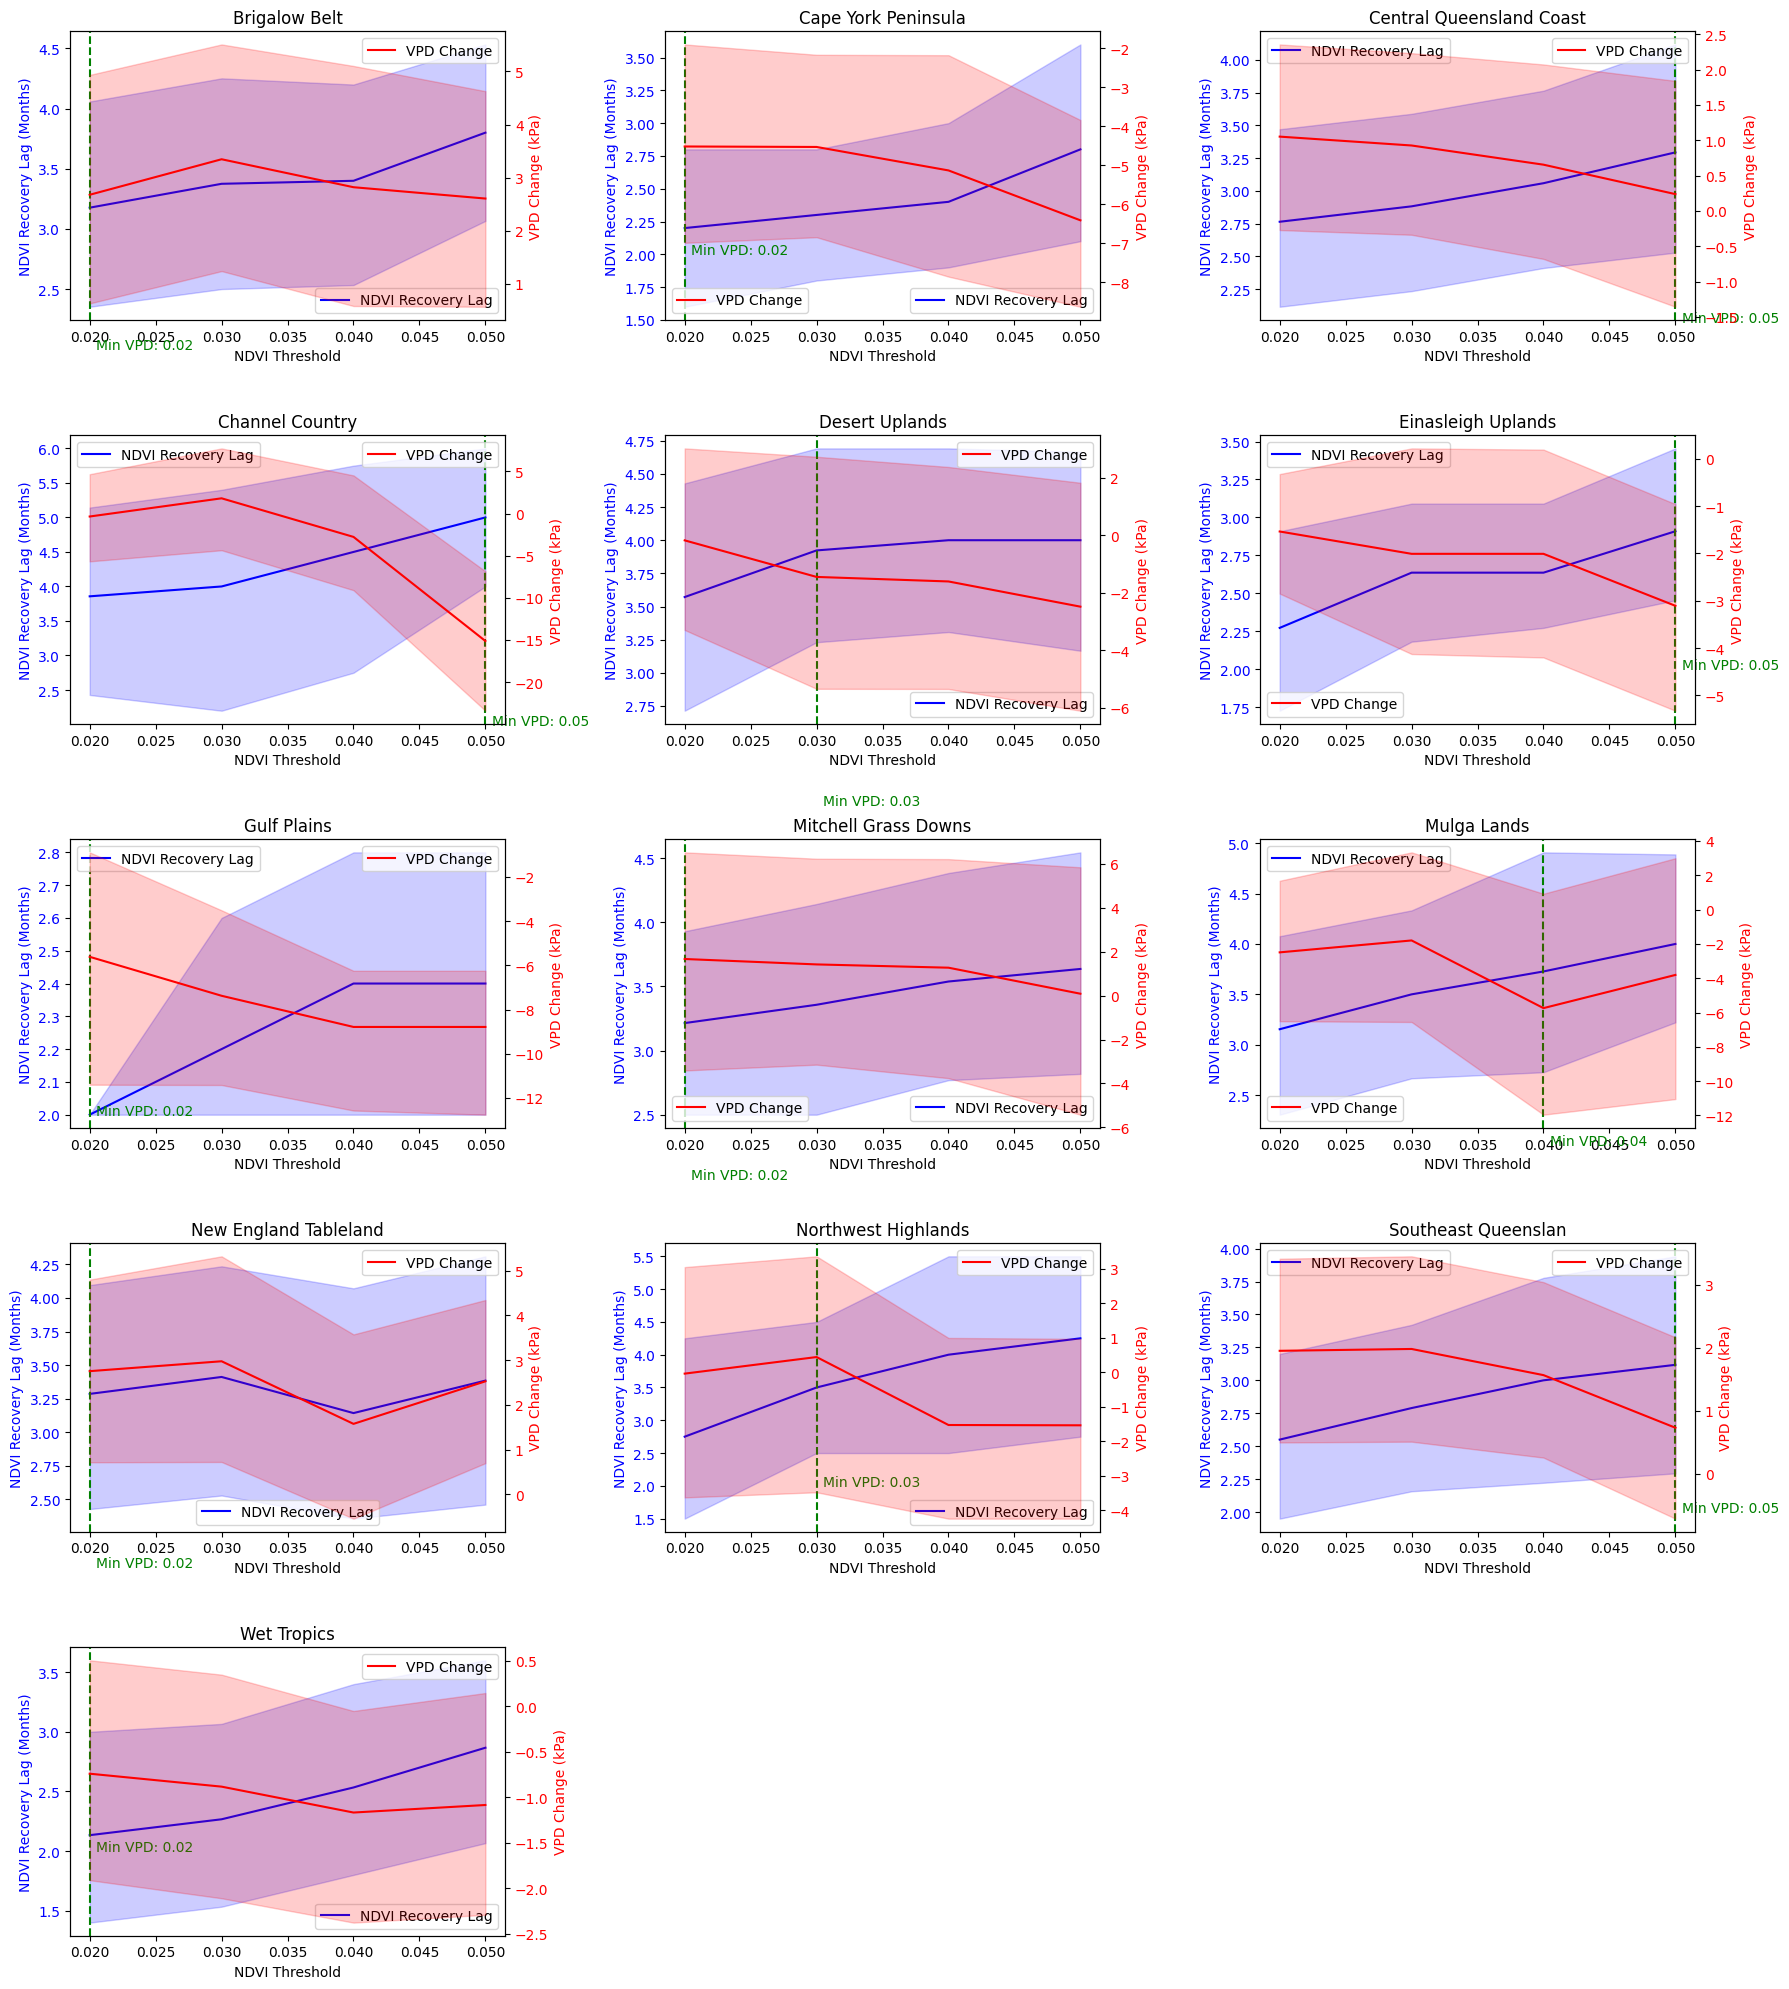

In [21]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory containing the CSV files
csv_directory = "Data\\Merged SPI & NDVI & VPD\\Region wise CSV"

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Define NDVI threshold range
thresholds = [0.02, 0.03, 0.04, 0.05]

# Store results for each region
region_results = {}

# Function to calculate NDVI recovery lag
def calculate_ndvi_recovery_lag(threshold, ndvi, spi):
    recovery_lags = []
    recovery_indices = []
    for i in range(2, len(ndvi) - 6):
        if spi[i - 1] < -1 and spi[i] > -0.5:  # SPI recovery
            ndvi_start = ndvi[i]
            for lag in range(1, 7):  # Look ahead up to 6 months
                if ndvi[i + lag] - ndvi_start >= threshold:
                    recovery_lags.append(lag)
                    recovery_indices.append(i)
                    break
    return recovery_lags, recovery_indices

# Process each CSV file
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    data = pd.read_csv(file_path)
    region_name = data['Region_Name'].iloc[0]
    
    all_results = []
    
    for threshold in thresholds:
        recovery_lags, recovery_indices = calculate_ndvi_recovery_lag(threshold, data['NDVI'], data['SPI'])
        
        for i in range(len(recovery_lags)):
            start_index = recovery_indices[i]
            lag = recovery_lags[i]
            vpd_change = data['VPD'].iloc[start_index + lag] - data['VPD'].iloc[start_index]
            
            all_results.append({
                'Threshold': threshold,
                'NDVI Recovery Lag (Months)': lag,
                'VPD Change (kPa)': vpd_change
            })
    
    region_results[region_name] = pd.DataFrame(all_results)

# Plotting: 3 plots per row
num_regions = len(region_results)
cols = 3
rows = (num_regions + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Loop over each region
for idx, (region_name, results_df) in enumerate(region_results.items()):
    ax1 = axes[idx]
    
    # First Y-axis: NDVI Recovery Lag
    sns.lineplot(data=results_df, x="Threshold", y="NDVI Recovery Lag (Months)", ax=ax1, color='blue', label='NDVI Recovery Lag')
    ax1.set_ylabel('NDVI Recovery Lag (Months)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Second Y-axis: VPD Change
    ax2 = ax1.twinx()
    sns.lineplot(data=results_df, x="Threshold", y="VPD Change (kPa)", ax=ax2, color='red', label='VPD Change')
    ax2.set_ylabel('VPD Change (kPa)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Find where VPD change is minimum
    min_vpd_row = results_df.loc[results_df['VPD Change (kPa)'].idxmin()]
    min_vpd_threshold = min_vpd_row['Threshold']
    
    # Add vertical line at min VPD change
    ax1.axvline(x=min_vpd_threshold, color='green', linestyle='--', label='Min VPD Change')  # Min VPD change line

    # Add label for the min VPD line
    ax1.text(min_vpd_threshold + 0.0005, 2, f'Min VPD: {min_vpd_threshold}', color='green', fontsize=10)

    ax1.set_title(f'{region_name}')
    ax1.set_xlabel('NDVI Threshold')

# Turn off unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Threshold: 0.02, Lag: 2, VPD Change: -4.617338610000001
Threshold: 0.02, Lag: 1, VPD Change: -2.8849219700000006
Threshold: 0.02, Lag: 2, VPD Change: -3.482781000000003
Threshold: 0.02, Lag: 1, VPD Change: 1.1084028300000028
Threshold: 0.02, Lag: 4, VPD Change: -12.20078139
Threshold: 0.02, Lag: 2, VPD Change: -6.930285119999999
Threshold: 0.02, Lag: 4, VPD Change: -5.788389679999998
Threshold: 0.02, Lag: 2, VPD Change: 2.716107779999998
Threshold: 0.02, Lag: 2, VPD Change: -7.068029970000001
Threshold: 0.02, Lag: 2, VPD Change: -6.000425750000002
Threshold: 0.03, Lag: 2, VPD Change: -4.617338610000001
Threshold: 0.03, Lag: 1, VPD Change: -2.8849219700000006
Threshold: 0.03, Lag: 2, VPD Change: -3.482781000000003
Threshold: 0.03, Lag: 2, VPD Change: 0.9860540300000018
Threshold: 0.03, Lag: 4, VPD Change: -12.20078139
Threshold: 0.03, Lag: 2, VPD Change: -6.930285119999999
Threshold: 0.03, Lag: 4, VPD Change: -5.788389679999998
Threshold: 0.03, Lag: 2, VPD Change: 2.716107779999998
Thre

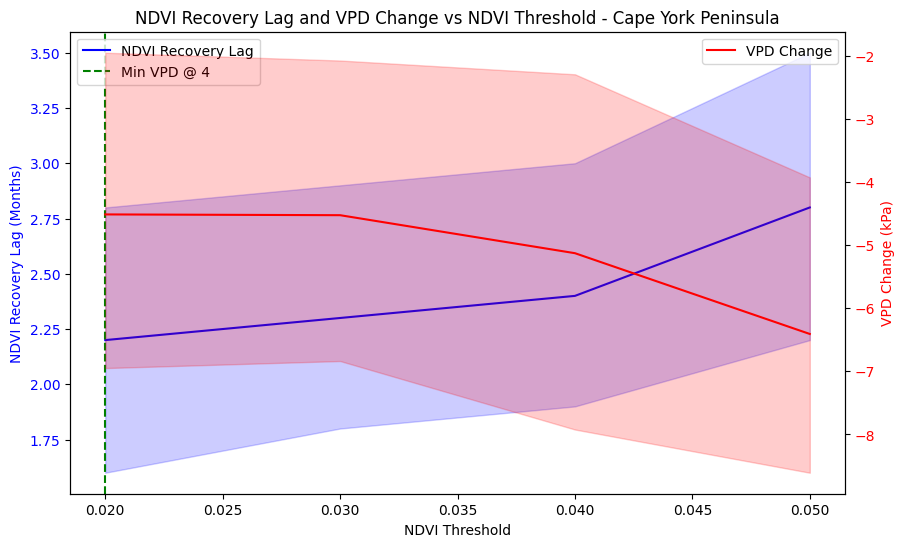

Correlation between NDVI Recovery Lag and VPD Change: -0.5862946186695859


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Data/Merged SPI & NDVI & VPD/Region wise CSV/Cape York Peninsula.csv")

# Example: Define your NDVI threshold range
thresholds = [0.02, 0.03, 0.04, 0.05]

# Initialize a list to store results
all_results = []

# Function to calculate NDVI recovery lag
def calculate_ndvi_recovery_lag(threshold, ndvi, spi):
    recovery_lags = []
    recovery_indices = []
    for i in range(2, len(ndvi) - 6):
        if spi[i - 1] < -1 and spi[i] > -0.5:  # SPI recovery
            ndvi_start = ndvi[i]
            for lag in range(1, 7):  # Look ahead up to 6 months
                if ndvi[i + lag] - ndvi_start >= threshold:
                    recovery_lags.append(lag)
                    recovery_indices.append(i)
                    break
    return recovery_lags, recovery_indices

# Loop through the thresholds
for threshold in thresholds:
    # Get recovery lags and start indices
    recovery_lags, recovery_indices = calculate_ndvi_recovery_lag(threshold, data['NDVI'], data['SPI'])
    
    vpd_changes = []
    for i in range(len(recovery_lags)):
        start_index = recovery_indices[i]
        lag = recovery_lags[i]
        vpd_start = data['VPD'].iloc[start_index]
        vpd_end = data['VPD'].iloc[start_index + lag]
        vpd_change = vpd_end - vpd_start
        vpd_changes.append(vpd_change)
        
        print(f"Threshold: {threshold}, Lag: {lag}, VPD Change: {vpd_change}")

        # Store the result
        all_results.append({
            'Threshold': threshold,
            'NDVI Recovery Lag (Months)': lag,
            'VPD Change (kPa)': vpd_change
        })

# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

fig, ax1 = plt.subplots(figsize=(10, 6))

# First Y-axis: NDVI Recovery Lag
sns.lineplot(data=results_df, x="Threshold", y="NDVI Recovery Lag (Months)", ax=ax1, color='blue', label='NDVI Recovery Lag')
ax1.set_ylabel('NDVI Recovery Lag (Months)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second Y-axis: VPD Change
ax2 = ax1.twinx()
sns.lineplot(data=results_df, x="Threshold", y="VPD Change (kPa)", ax=ax2, color='red', label='VPD Change')
ax2.set_ylabel('VPD Change (kPa)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Find the threshold with minimum VPD change
min_vpd_index = results_df['VPD Change (kPa)'].idxmin()
min_vpd_threshold = results_df.loc[min_vpd_index, 'Threshold']

# Add vertical line to mark this threshold
ax1.axvline(x=min_vpd_threshold, color='green', linestyle='--', label=f'Min VPD @ {min_vpd_index}')
ax1.legend(loc='upper left')  # Adjust as needed


plt.title('NDVI Recovery Lag and VPD Change vs NDVI Threshold - ' + data['Region_Name'].iloc[0])
ax1.set_xlabel('NDVI Threshold')
plt.show()

# Correlation between NDVI Recovery Lag and VPD Change
correlation = results_df['NDVI Recovery Lag (Months)'].corr(results_df['VPD Change (kPa)'])
print(f"Correlation between NDVI Recovery Lag and VPD Change: {correlation}")

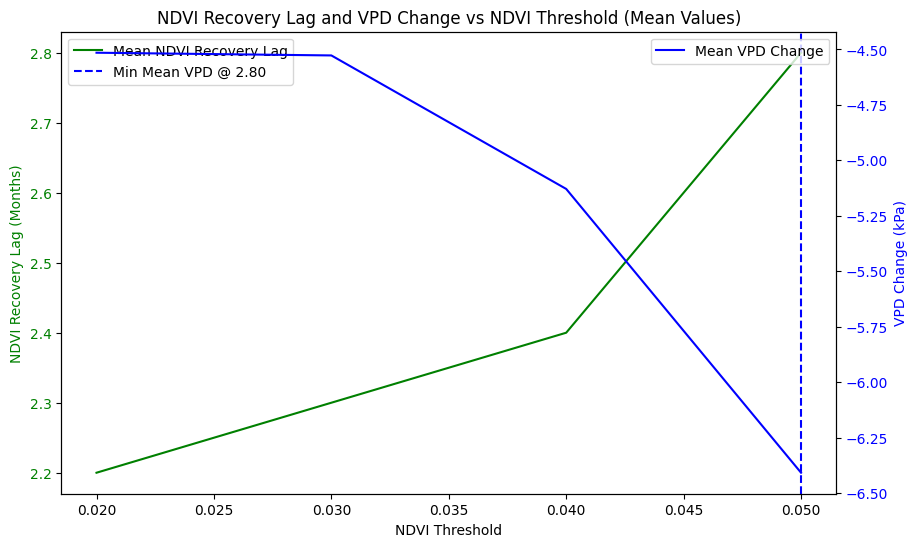

Correlation between NDVI Recovery Lag and VPD Change: -0.5862946186695859


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Data/Merged SPI & NDVI & VPD/Region wise CSV/Cape York Peninsula.csv")

# Example: Define your NDVI threshold range
thresholds = [0.02, 0.03, 0.04, 0.05]

# Initialize a list to store results
all_results = []

# Function to calculate NDVI recovery lag
def calculate_ndvi_recovery_lag(threshold, ndvi, spi):
    recovery_lags = []
    recovery_indices = []
    for i in range(2, len(ndvi) - 6):
        if spi[i - 1] < -1 and spi[i] > -0.5:  # SPI recovery
            ndvi_start = ndvi[i]
            for lag in range(1, 7):  # Look ahead up to 6 months
                if ndvi[i + lag] - ndvi_start >= threshold:
                    recovery_lags.append(lag)
                    recovery_indices.append(i)
                    break
    return recovery_lags, recovery_indices

# Loop through the thresholds
for threshold in thresholds:
    # Get recovery lags and start indices
    recovery_lags, recovery_indices = calculate_ndvi_recovery_lag(threshold, data['NDVI'], data['SPI'])
    
    vpd_changes = []
    for i in range(len(recovery_lags)):
        start_index = recovery_indices[i]
        lag = recovery_lags[i]
        vpd_start = data['VPD'].iloc[start_index]
        vpd_end = data['VPD'].iloc[start_index + lag]
        vpd_change = vpd_end - vpd_start
        vpd_changes.append(vpd_change)
        
        # print(f"Threshold: {threshold}, Lag: {lag}, VPD Change: {vpd_change}")

        # Store the result
        all_results.append({
            'Threshold': threshold,
            'NDVI Recovery Lag (Months)': lag,
            'VPD Change (kPa)': vpd_change
        })

# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

# Group by threshold to get mean VPD Change and NDVI Lag
mean_df = results_df.groupby('Threshold', as_index=False).mean()

# Plot the mean values instead
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mean_df, x="Threshold", y="NDVI Recovery Lag (Months)", ax=ax1, color='green', label='Mean NDVI Recovery Lag')
ax1.set_ylabel('NDVI Recovery Lag (Months)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
sns.lineplot(data=mean_df, x="Threshold", y="VPD Change (kPa)", ax=ax2, color='blue', label='Mean VPD Change')
ax2.set_ylabel('VPD Change (kPa)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# recovery_Lags at NDVI threshold 0.05
NDVI_t = 0.05
recovery_lags = results_df.loc[results_df['Threshold'] == NDVI_t, 'NDVI Recovery Lag (Months)'].mean()

# Add vertical line at the threshold with lowest mean VPD change
min_mean_vpd_threshold = mean_df.loc[mean_df['VPD Change (kPa)'].idxmin(), 'Threshold']
min_mean_vpd = mean_df['VPD Change (kPa)'].min()
ax1.axvline(x=min_mean_vpd_threshold, color='blue', linestyle='--', label=f'Min Mean VPD @ {recovery_lags:.2f}')
ax1.legend(loc='upper left')

plt.title('NDVI Recovery Lag and VPD Change vs NDVI Threshold (Mean Values)')
ax1.set_xlabel('NDVI Threshold')
plt.show()

# Correlation between NDVI Recovery Lag and VPD Change
correlation = results_df['NDVI Recovery Lag (Months)'].corr(results_df['VPD Change (kPa)'])
print(f"Correlation between NDVI Recovery Lag and VPD Change: {correlation}")

C:\Users\Jspch\AppData\Local\Temp\ipykernel_24180\3834975768.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
C:\Users\Jspch\AppData\Local\Temp\ipykernel_24180\3834975768.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


TypeError: unsupported format string passed to Axes.__format__

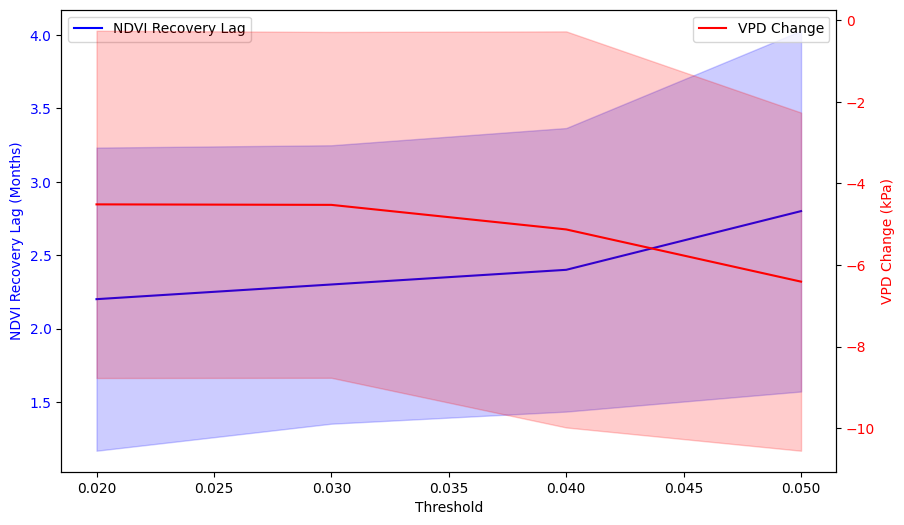

In [4]:
# Group by threshold to get mean and standard deviation
mean_df = results_df.groupby('Threshold', as_index=False).mean()

# Start plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot NDVI Recovery Lag with SD shading
sns.lineplot(
    data=results_df,
    x="Threshold",
    y="NDVI Recovery Lag (Months)",
    ax=ax1,
    color='blue',
    label='NDVI Recovery Lag',
    ci='sd'  # Show standard deviation as shaded area
)
ax1.set_ylabel('NDVI Recovery Lag (Months)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second Y-axis for VPD Change
ax2 = ax1.twinx()
sns.lineplot(
    data=results_df,
    x="Threshold",
    y="VPD Change (kPa)",
    ax=ax2,
    color='red',
    label='VPD Change',
    ci='sd'  # Show standard deviation as shaded area
)
ax2.set_ylabel('VPD Change (kPa)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add vertical line at the threshold with lowest mean VPD Change
min_mean_vpd_threshold = mean_df.loc[mean_df['VPD Change (kPa)'].idxmin(), 'Threshold']
ax1.axvline(x=min_mean_vpd_threshold, color='green', linestyle='--', label=f'Min Mean VPD @ {ax1:.2f}')

# Legends and labels
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('NDVI Threshold')
plt.title('NDVI Recovery Lag and VPD Change vs NDVI Threshold (Mean ± SD)')
plt.tight_layout()
plt.show()


C:\Users\Jspch\AppData\Local\Temp\ipykernel_24180\3474545141.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
C:\Users\Jspch\AppData\Local\Temp\ipykernel_24180\3474545141.py:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


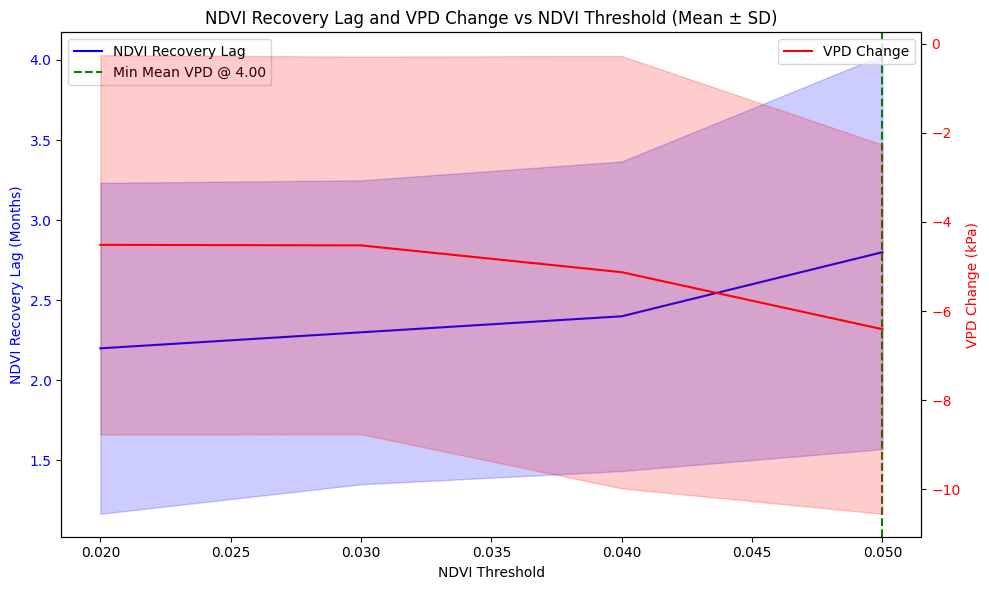

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Data/Merged SPI & NDVI & VPD/Region wise CSV/Cape York Peninsula.csv")

# Example: Define your NDVI threshold range
thresholds = [0.02, 0.03, 0.04, 0.05]

# Initialize a list to store results
all_results = []

# Function to calculate NDVI recovery lag
def calculate_ndvi_recovery_lag(threshold, ndvi, spi):
    recovery_lags = []
    recovery_indices = []
    for i in range(2, len(ndvi) - 6):
        if spi[i - 1] < -1 and spi[i] > -0.5:  # SPI recovery
            ndvi_start = ndvi[i]
            for lag in range(1, 7):  # Look ahead up to 6 months
                if ndvi[i + lag] - ndvi_start >= threshold:
                    recovery_lags.append(lag)
                    recovery_indices.append(i)
                    break
    return recovery_lags, recovery_indices

# Loop through the thresholds
for threshold in thresholds:
    # Get recovery lags and start indices
    recovery_lags, recovery_indices = calculate_ndvi_recovery_lag(threshold, data['NDVI'], data['SPI'])
    
    vpd_changes = []
    for i in range(len(recovery_lags)):
        start_index = recovery_indices[i]
        lag = recovery_lags[i]
        vpd_start = data['VPD'].iloc[start_index]
        vpd_end = data['VPD'].iloc[start_index + lag]
        vpd_change = vpd_end - vpd_start
        vpd_changes.append(vpd_change)
        
        # print(f"Threshold: {threshold}, Lag: {lag}, VPD Change: {vpd_change}")

        # Store the result
        all_results.append({
            'Threshold': threshold,
            'NDVI Recovery Lag (Months)': lag,
            'VPD Change (kPa)': vpd_change
        })

# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

# Group by threshold to get mean and standard deviation
mean_df = results_df.groupby('Threshold', as_index=False).mean()

# Start plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot NDVI Recovery Lag with SD shading
sns.lineplot(
    data=results_df,
    x="Threshold",
    y="NDVI Recovery Lag (Months)",
    ax=ax1,
    color='blue',
    label='NDVI Recovery Lag',
    ci='sd'  # Show standard deviation as shaded area
)
ax1.set_ylabel('NDVI Recovery Lag (Months)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second Y-axis for VPD Change
ax2 = ax1.twinx()
sns.lineplot(
    data=results_df,
    x="Threshold",
    y="VPD Change (kPa)",
    ax=ax2,
    color='red',
    label='VPD Change',
    ci='sd'  # Show standard deviation as shaded area
)
ax2.set_ylabel('VPD Change (kPa)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# recovery_Lags at NDVI threshold 0.05
NDVI_month = 0.05
recovery_lags = results_df.loc[results_df['Threshold'] == NDVI_month, 'NDVI Recovery Lag (Months)'].values[3]

# Add vertical line at the threshold with lowest mean VPD Change
min_mean_vpd_threshold = mean_df.loc[mean_df['VPD Change (kPa)'].idxmin(), 'Threshold']
ax1.axvline(x=min_mean_vpd_threshold, color='green', linestyle='--', label=f'Min Mean VPD @ {recovery_lags:.2f}')

# Legends and labels
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('NDVI Threshold')
plt.title('NDVI Recovery Lag and VPD Change vs NDVI Threshold (Mean ± SD)')
plt.tight_layout()
plt.show()
